In [1]:
import uproot
import pandas as pd
from variables import *
from config.software_pe import *
import matplotlib.pyplot as plt
from Loader import Loader
import numpy as np

%load_ext autoreload
%autoreload 2

In [2]:
import os

os.getcwd()

'/sbnd/app/users/brindenc/PAD'

In [69]:
l = Loader(DATA_DIR,PAD_DIR,HDUMP_NAME,SM_NAME,WFM_NAME,mode='prompt')
l.run_list

************************************************************
Load PMT/XA channel info : 0.01 s
Load commissioning tree : 0.01 s
Load op info : 0.14 s
Load waveforms : 0.00 s
************************************************************


array([[  1, 445,   9]], dtype=int32)

In [70]:
l.get_event(1,445,9)

In [71]:
l.op_df

,run,sub,evt,ch_prelimPE,ch_promptPE,ch_AboveThreshold,ch_ID
0,1,445,9,0.25,64.0,0,6
0,1,445,9,0.375,0.25,0,7
0,1,445,9,0.75,82.125,0,8
0,1,445,9,0.375,0.25,0,9
0,1,445,9,0.375,114.75,0,10
...,...,...,...,...,...,...,...
0,1,445,9,0.375,0.375,0,301
0,1,445,9,0.25,112.875,0,302
0,1,445,9,0.25,2.75,0,303
0,1,445,9,0.375,67.375,0,304


In [76]:
pmts = l.get_pmt_list(coatings=[1,2])

pds_id :  6
[64.0]
pds_id :  7
[0.25]
pds_id :  8
[82.125]
pds_id :  9
[0.25]
pds_id :  10
[114.75]
pds_id :  11
[0.25]
pds_id :  12
[105.25]
pds_id :  13
[0.25]
pds_id :  14
[78.125]
pds_id :  15
[0.375]
pds_id :  16
[69.5]
pds_id :  17
[0.25]
pds_id :  60
[103.0]
pds_id :  61
[0.25]
pds_id :  62
[158.125]
pds_id :  63
[0.25]
pds_id :  64
[138.0]
pds_id :  65
[0.375]
pds_id :  66
[265.375]
pds_id :  67
[0.25]
pds_id :  68
[196.5]
pds_id :  69
[0.25]
pds_id :  70
[80.125]
pds_id :  71
[0.25]
pds_id :  84
[107.875]
pds_id :  85
[0.375]
pds_id :  86
[317.375]
pds_id :  87
[3.875]
pds_id :  88
[348.125]
pds_id :  89
[0.25]
pds_id :  90
[435.75]
pds_id :  91
[0.25]
pds_id :  92
[282.875]
pds_id :  93
[0.25]
pds_id :  94
[186.375]
pds_id :  95
[0.375]
pds_id :  138
[170.75]
pds_id :  139
[0.25]
pds_id :  140
[336.875]
pds_id :  141
[0.375]
pds_id :  142
[547.5]
pds_id :  143
[0.375]
pds_id :  144
[869.5]
pds_id :  145
[0.375]
pds_id :  146
[506.625]
pds_id :  147
[0.375]
pds_id :  148
[231.

In [29]:
tree = uproot.open(f'/sbnd/data/users/brindenc/analyze_sbnd/PDS/pgun1/hitdumper_tree.root:hitdumper;1/hitdumpertree;1')
ishan = uproot.open(f'/sbnd/data/users/ipatel/NC_trigger/test_fcl/v1/test_hist.root:pmtSoftwareTrigger/software_metrics_tree;1')
ishan.keys()

['run',
 'sub',
 'evt',
 'beam_trig',
 'time_trig',
 'npmt',
 'promptPE',
 'prelimPE',
 'ch_prelimPE',
 'ch_promptPE',
 'ch_AboveThreshold',
 'ch_ID']

In [66]:
pmtsoftkeys = [key for key in ishan.keys() if 'ch_' in key]
df = ishan.arrays(HDRKEYS+pmtsoftkeys,library='pd')
exploded_columns = []
for column in df.columns:
    if 'ch_' in column:
        df[column] = df[column][0]
        exploded_columns.append(column)
df.explode(exploded_columns)

,run,sub,evt,ch_prelimPE,ch_promptPE,ch_AboveThreshold,ch_ID
0,1,445,9,0.25,64.0,0,6
0,1,445,9,0.375,0.25,0,7
0,1,445,9,0.75,82.125,0,8
0,1,445,9,0.375,0.25,0,9
0,1,445,9,0.375,114.75,0,10
...,...,...,...,...,...,...,...
0,1,445,9,0.375,0.375,0,301
0,1,445,9,0.25,112.875,0,302
0,1,445,9,0.25,2.75,0,303
0,1,445,9,0.375,67.375,0,304


In [67]:
df

,run,sub,evt,ch_prelimPE,ch_promptPE,ch_AboveThreshold,ch_ID
0,1,445,9,"(0.25, 0.375, 0.75, 0.375, 0.375, 0.25, 0.375,...","(64.0, 0.25, 82.125, 0.25, 114.75, 0.25, 105.2...","(0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","(6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 3..."


In [122]:
import dash
dash.__version__

'2.9.3'

In [114]:
muon_dir = '/sbnd/data/users/brindenc/analyze_sbnd/PDS/pgun2/'
l = Loader(DATA_DIR,PAD_DIR,'hitdumper_tree.root',load_muon=True)

************************************************************
Load PMT/XA channel info : 0.02 s
Load commissioning tree : 0.14 s
Load op info : 2.77 s
Load muon tracks : 0.02 s
************************************************************


In [118]:
l.get_event(1,0,1)
l.muon_evt
pd.__version__
#pmts = l.get_pmt_list(0)

'1.3.3'

In [120]:
uproot.__version__

'4.1.3'

In [111]:
l.muon_evt

,,run,subrun,event,nmuontrks,muontrk_t0,muontrk_x1,muontrk_y1,muontrk_z1,muontrk_x2,muontrk_y2,muontrk_z2,muontrk_theta_xz,muontrk_theta_yz,muontrk_tpc,muontrk_type
entry,subentry,,,,,,,,,,,,,,,
2,0,1,0,3,1,-999.0,-202.050003,199.792053,388.049988,-202.050003,57.937099,504.149994,38.659805,-50.701675,0,5


In [110]:
#for i,muon in enumerate(l.muon_evt):
#print(i,muon)
#type(l.muon_evt),
#l.muon_evt.muontrk_x1.values
l.get_event(1,0,3)
muons_tpc0 = l.get_muon_list(0)
scs = [muons_tpc0[i].plot_line(i,0) for i in range(len(muons_tpc0))]
fig = go.Figure(data=scs)
fig.show()

In [ ]:
tree = uproot.open(f'{DATA_DIR}/{HDUMP_NAME}:hitdumper;1/hitdumpertree;1')
l = tree.keys()
#print(l)

['run', 'subrun', 'event', 'evttime', 't0', 'nhits', 'hit_cryostat', 'hit_tpc', 'hit_plane', 'hit_wire', 'hit_channel', 'hit_peakT', 'hit_charge', 'hit_ph', 'hit_width', 'hit_full_integral', 'nstrips', 'crt_plane', 'crt_module', 'crt_strip', 'crt_orient', 'crt_time', 'crt_adc', 'crt_pos_x', 'crt_pos_y', 'crt_pos_z', 'nctrks', 'ctrk_x1', 'ctrk_y1', 'ctrk_z1', 'ctrk_t1', 'ctrk_adc1', 'ctrk_mod1x', 'ctrk_x2', 'ctrk_y2', 'ctrk_z2', 'ctrk_t2', 'ctrk_adc2', 'ctrk_mod2x', 'nophits', 'ophit_opch', 'ophit_opdet', 'ophit_peakT', 'ophit_width', 'ophit_area', 'ophit_amplitude', 'ophit_pe', 'ophit_opdet_x', 'ophit_opdet_y', 'ophit_opdet_z', 'ophit_opdet_type', 'pmtTrigger_npmtshigh', 'pmtTrigger_maxpassed', 'pmtSoftTrigger_foundBeamTrigger', 'pmtSoftTrigger_tts', 'pmtSoftTrigger_promptPE', 'pmtSoftTrigger_prelimPE', 'pmtSoftTrigger_nAboveThreshold', 'crtSoftTrigger_hitsperplane', 'mcevts_truth', 'nuScatterCode_truth', 'nuID_truth', 'nuPDG_truth', 'ccnc_truth', 'mode_truth', 'enu_truth', 'Q2_truth',

In [85]:
gen_keys = [key for key in tree.keys() if 'genie' in key or 'nu' in key]
gen_df = tree.arrays(hdr_keys+gen_keys,library='pd')
gen_df[1]

run  subrun  event  genie_no_primaries  genie_primaries_pdg  \
entry subentry                                                                
0     0           1     445      9                  25                   14   
      1           1     445      9                  25           1000180400   
      2           1     445      9                  25                 2212   
      3           1     445      9                  25           1000170390   
      4           1     445      9                  25                   14   
...             ...     ...    ...                 ...                  ...   
141   5           1     445    599                  10                   14   
      6           1     445    599                  10                 2112   
      7           1     445    599                  10                 2112   
      8           1     445    599                  10           2000000002   
      9           1     445    599                  10           2000000101   

                genie_Eng  genie_Px  genie_Py  genie_Pz    genie_P  \
entry subentry                                                       
0     0          1.480434 -0.008622  0.001454  1.480408   1.480434   
      1         37.215527  0.000000  0.000000  0.000000   0.000000   
      2          0.925958 -0.020904  0.065395 -0.028538        NaN   
      3         36.289570  0.020904 -0.065395  0.028538        NaN   
      4          0.142005 -0.021005  0.107882  0.089921   0.142005   
...                   ...       ...       ...       ...        ...   
141   5          0.917410  0.333465  0.130226  0.844679   0.917410   
      6          0.989021 -0.218033 -0.214167 -0.044412   0.308834   
      7          0.985968 -0.211030 -0.207288 -0.042986   0.298914   
      8         36.275276 -0.085898  0.086752  0.168141  36.275276   
      9          0.003052 -0.007003 -0.006879 -0.001427   0.003052   

                genie_status_code  genie_mass  genie_trackID  genie_ND  \
entry subentry                                                           
0     0                         0    0.000000              0         0   
      1                         0   37.215527              1         0   
      2                        11    0.938272              2         0   
      3                         2   36.289783              3         0   
      4                         1    0.000000              4         0   
...                           ...         ...            ...       ...   
141   5                         1    0.000000              5         0   
      6                        14    0.939565              6         0   
      7                         1    0.939565              7         0   
      8                        15    0.000000              8         0   
      9                         1    0.000000              9         0   

                genie_mother  
entry subentry                
0     0                   -1  
      1                   -1  
      2                    1  
      3                    1  
      4                    0  
...                      ...  
141   5                    0  
      6                    2  
      7                    6  
      8                    3  
      9                   -1  

[1890 rows x 15 columns]

In [38]:
ch_keys = [key for key in ishan.keys() if 'ch_' in key]
arr = ishan.arrays(ch_keys,library='np')
ch_keys

['ch_prelimPE', 'ch_promptPE', 'ch_AboveThreshold', 'ch_ID']

In [41]:
np.unique(arr['ch_prelimPE'][0][0],return_counts=True)
np.array(arr['ch_prelimPE'][0][0])

array([2.50000e-01, 3.75000e-01, 7.50000e-01, 3.75000e-01, 3.75000e-01,
       2.50000e-01, 3.75000e-01, 3.75000e-01, 5.00000e-01, 2.50000e-01,
       3.75000e-01, 3.75000e-01, 3.75000e-01, 3.75000e-01, 3.75000e-01,
       3.75000e-01, 3.75000e-01, 2.50000e-01, 3.75000e-01, 2.50000e-01,
       3.75000e-01, 2.50000e-01, 1.25000e+01, 2.50000e-01, 8.00000e+00,
       2.50000e-01, 7.12500e+00, 2.50000e-01, 3.75000e-01, 3.75000e-01,
       3.75000e-01, 2.50000e-01, 7.37500e+00, 3.75000e-01, 6.76250e+01,
       2.50000e-01, 1.52500e+02, 2.50000e-01, 3.66250e+01, 3.75000e-01,
       1.00000e+00, 3.75000e-01, 3.75000e-01, 3.75000e-01, 2.50000e-01,
       3.75000e-01, 3.75000e-01, 3.75000e-01, 7.50000e-01, 2.50000e-01,
       2.05000e+01, 3.75000e-01, 1.49625e+02, 3.75000e-01, 4.09500e+02,
       2.50000e-01, 1.61250e+02, 2.50000e-01, 3.50000e+00, 2.50000e-01,
       7.50000e-01, 2.50000e-01, 1.36250e+01, 3.75000e-01, 8.95000e+01,
       3.75000e-01, 2.20625e+02, 2.50000e-01, 8.88750e+01, 2.500

In [4]:
muon_keys = [key for key in tree.keys() if 'muon' in key]
hdr_keys = ['run','subrun','event']
muon_df = tree.arrays(hdr_keys+muon_keys,library='pd')

In [15]:
muon_evt = muon_df.query('run == 1 and subrun == 0 and event == 2')
s = muon_evt.iloc[0]
trk_type, tpc, x1, y1, z1, x2, y2, z2, theta_xz, theta_yz = s.muontrk_type, s.muontrk_tpc, s.muontrk_x1, s.muontrk_y1, s.muontrk_z1, s.muontrk_x2, s.muontrk_y2, s.muontrk_z2, s.muontrk_theta_xz, s.muontrk_theta_yz
tpc

0.0

In [29]:
from Muon import Muon
import plotly.graph_objects as go
m = Muon(trk_type, tpc, x1, y1, z1, x2, y2, z2, theta_xz, theta_yz)
sc = m.plot_line(0,0)
fig = go.Figure(data=sc)
fig.show()

In [41]:
hit_keys = [key for key in tree.keys() if 'hit' in key]
hdr_keys = ['run','subrun','event']
hit_df = tree.arrays(hdr_keys+hit_keys,library='pd')[0]

In [47]:
hit_evt_tpc0 = hit_df.query('run == 1 and subrun == 0 and event == 1 and hit_tpc == 1')

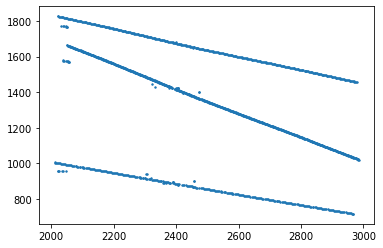

In [48]:
x = hit_evt_tpc0.hit_peakT.values
y = hit_evt_tpc0.hit_wire.values
plt.scatter(x,y,s=2)

In [36]:
muon_df

,,run,subrun,event,nmuontrks,muontrk_t0,muontrk_x1,muontrk_y1,muontrk_z1,muontrk_x2,muontrk_y2,muontrk_z2,muontrk_theta_xz,muontrk_theta_yz,muontrk_tpc,muontrk_type
entry,subentry,,,,,,,,,,,,,,,


In [51]:
crt_keys = [key for key in tree.keys() if 'crt' in key]
hdr_keys = ['run','subrun','event']
crt_df = tree.arrays(hdr_keys+crt_keys,library='pd')

In [52]:
crt_df

,,run,subrun,event,crt_plane,crt_module,crt_strip,crt_orient,crt_time,crt_adc,crt_pos_x,crt_pos_y,crt_pos_z
entry,subentry,,,,,,,,,,,,


In [2]:
l = Loader(DATA_DIR,PAD_DIR,HDUMP_NAME,WFM_NAME)

************************************************************************************************************************
Load PMT/XA channel info : 0.01 s
Load commissioning tree : 6.34 s
Load waveforms : 0.00 s
************************************************************************************************************************


In [19]:
#Select event
run,subrun,event = l.run_list[0]
l.get_event(run,subrun,event)
l.run_list

Got run 1 subrun 445 event 9


array([[  1, 445,   9],
       [  1, 445,  14],
       [  1, 445,  19],
       [  1, 445,  20],
       [  1, 445,  25],
       [  1, 445,  28],
       [  1, 445,  31],
       [  1, 445,  37],
       [  1, 445,  41],
       [  1, 445,  43],
       [  1, 445,  44],
       [  1, 445,  50],
       [  1, 445,  52],
       [  1, 445,  55],
       [  1, 445,  59],
       [  1, 445,  62],
       [  1, 445,  68],
       [  1, 445,  77],
       [  1, 445,  78],
       [  1, 445,  80],
       [  1, 445, 107],
       [  1, 445, 113],
       [  1, 445, 115],
       [  1, 445, 117],
       [  1, 445, 118],
       [  1, 445, 119],
       [  1, 445, 123],
       [  1, 445, 127],
       [  1, 445, 128],
       [  1, 445, 129],
       [  1, 445, 131],
       [  1, 445, 134],
       [  1, 445, 142],
       [  1, 445, 143],
       [  1, 445, 144],
       [  1, 445, 147],
       [  1, 445, 148],
       [  1, 445, 156],
       [  1, 445, 157],
       [  1, 445, 158],
       [  1, 445, 160],
       [  1, 445

In [4]:
pmts = l.get_pmt_list(tpc=0)

Get PDS objs : 5.80 s


In [30]:
import numpy as np
np.max([pmt.op_pe.op_pe.sum() for pmt in pmts])
#pmts[-1].id

2072.7120209302498

In [77]:
l.get_event(run,subrun,event)
l.op_evt
pds_objs = l.get_pmt_list(tpc=0)

Get PDS objs : 2.75 s


In [78]:
#[print(i,pds.id) for i,pds in enumerate(pds_objs) if (pds.coating in [0,1] and pds.waveform is None)]
[print(i,pds.id,pds.coating) for i,pds in enumerate(pds_objs) if (pds.waveform is None)]

60 0 2.0
61 2 2.0
62 4 2.0
63 18 3.0
64 20 3.0
65 22 3.0
66 24 2.0
67 26 2.0
68 28 2.0
69 30 2.0
70 32 2.0
71 34 2.0
72 42 3.0
73 44 3.0
74 46 3.0
75 48 3.0
76 50 3.0
77 52 3.0
78 54 2.0
79 58 2.0
80 72 3.0
81 74 3.0
82 76 3.0
83 78 2.0
84 80 2.0
85 96 3.0
86 98 3.0
87 100 3.0
88 102 2.0
89 104 2.0
90 106 2.0
91 108 2.0
92 110 2.0
93 112 2.0
94 120 3.0
95 122 3.0
96 124 3.0
97 126 3.0
98 128 3.0
99 130 3.0
100 132 2.0
101 136 2.0
102 174 3.0
103 178 3.0
104 180 2.0
105 182 2.0
106 184 2.0
107 186 2.0
108 188 2.0
109 190 2.0
110 198 3.0
111 200 3.0
112 202 3.0
113 204 3.0
114 206 3.0
115 208 3.0
116 210 2.0
117 212 2.0
118 214 2.0
119 228 3.0
120 230 3.0
121 232 3.0
122 234 2.0
123 236 2.0
124 238 2.0
125 252 3.0
126 254 3.0
127 256 3.0
128 260 2.0
129 262 2.0
130 264 2.0
131 266 2.0
132 268 2.0
133 276 3.0
134 278 3.0
135 280 3.0
136 282 3.0
137 284 3.0
138 286 3.0
139 288 2.0
140 290 2.0
141 292 2.0
142 306 3.0
143 308 3.0
144 310 3.0
145 56 2.0
146 82 2.0
147 258 2.0


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [79]:
l.op_evt.ophit_peakT.max()
5%2

1

In [85]:
l.op_evt.ophit_opch == 6

entry  subentry
0      0            True
       1            True
       2            True
       3            True
       4            True
                   ...  
       4701        False
       4702        False
       4703        False
       4704        False
       4705        False
Name: ophit_opch, Length: 4706, dtype: bool

In [82]:
pds_objs[0].op_pe,pds_objs[1].op_pe,

(             time_bin         op_pe
 0       (-0.001, 2.0]  33903.768607
 1          (2.0, 4.0]  12861.137012
 2          (4.0, 6.0]   7378.579423
 3          (6.0, 8.0]   1722.672139
 4         (8.0, 10.0]    324.774833
 ..                ...           ...
 795  (1590.0, 1592.0]      0.000000
 796  (1592.0, 1594.0]      0.000000
 797  (1594.0, 1596.0]      0.000000
 798  (1596.0, 1598.0]      0.000000
 799  (1598.0, 1600.0]      0.000000
 
 [800 rows x 2 columns],
              time_bin         op_pe
 0       (-0.001, 2.0]  33903.768607
 1          (2.0, 4.0]  12861.137012
 2          (4.0, 6.0]   7378.579423
 3          (6.0, 8.0]   1722.672139
 4         (8.0, 10.0]    324.774833
 ..                ...           ...
 795  (1590.0, 1592.0]      0.000000
 796  (1592.0, 1594.0]      0.000000
 797  (1594.0, 1596.0]      0.000000
 798  (1596.0, 1598.0]      0.000000
 799  (1598.0, 1600.0]      0.000000
 
 [800 rows x 2 columns])

In [70]:
import plotly.graph_objects as go
idx=50
sc = pds_objs[idx].plot_coordinates(0,5)
fig = go.Figure(data=sc)
fig.show()
print(pds_objs[idx].id)

-- start :  0
-- end :  5
-- start int :  (-0.001, 2.0]
-- end int :  (4, 6]


250


In [2]:
tree = uproot.open(f'{DATA_DIR}/hitdumper_waveforms.root:hitdumper;1/hitdumpertree;1')

In [4]:
runs = tree.arrays(['run','subrun','event'],library='pd')
runs.values

array([[  1, 445,   9],
       [  1, 445,  14],
       [  1, 445,  19],
       [  1, 445,  20],
       [  1, 445,  25],
       [  1, 445,  28],
       [  1, 445,  31],
       [  1, 445,  37],
       [  1, 445,  41],
       [  1, 445,  43],
       [  1, 445,  44],
       [  1, 445,  50],
       [  1, 445,  52],
       [  1, 445,  55],
       [  1, 445,  59],
       [  1, 445,  62],
       [  1, 445,  68],
       [  1, 445,  77],
       [  1, 445,  78],
       [  1, 445,  80],
       [  1, 445, 107],
       [  1, 445, 113],
       [  1, 445, 115],
       [  1, 445, 117],
       [  1, 445, 118],
       [  1, 445, 119],
       [  1, 445, 123],
       [  1, 445, 127],
       [  1, 445, 128],
       [  1, 445, 129],
       [  1, 445, 131],
       [  1, 445, 134],
       [  1, 445, 142],
       [  1, 445, 143],
       [  1, 445, 144],
       [  1, 445, 147],
       [  1, 445, 148],
       [  1, 445, 156],
       [  1, 445, 157],
       [  1, 445, 158],
       [  1, 445, 160],
       [  1, 445

In [5]:
if runs:
  print('q')

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [12]:
pmt_arapuca_info = pd.read_pickle(f'{DATA_DIR}/PMT_ARAPUCA_info.pkl')
pmt_arapuca_info

,ophit_opdet_x,ophit_opdet_y,ophit_opdet_z,ophit_opdet_type,opdet_tpc,ophit_opdet
ophit_opch,,,,,,
6,-213.40,-175.0,27.874225,0,0,6
7,213.40,-175.0,27.874225,0,1,7
8,-213.40,-95.0,27.874225,0,0,8
9,213.40,-95.0,27.874225,0,1,9
10,-213.40,-40.0,27.874225,0,0,10
...,...,...,...,...,...,...
310,-213.75,135.0,489.145775,3,0,310
311,213.75,135.0,489.145775,3,1,311
56,-213.75,0.0,80.254225,2,0,56


In [13]:
def convert_edges_to_centers(edges):
  """_summary_

  Args:
      edges (_type_): _description_

  Returns:
      _type_: _description_
  """
  de = edges[1]-edges[0]
  return [e+de/2 for e in edges[:-1]]

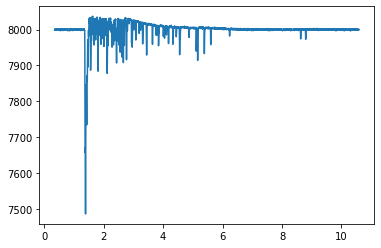

In [14]:
run,subrun,event = 1,445,9
pmt_id = 6
wtree = uproot.open(f'{DATA_DIR}/waveforms.root')
hist_name = f'pmtSoftwareTrigger/run_{run}subrun_{subrun}event_{event}_pmtnum_{pmt_id};1'
hist = wtree[hist_name]
#help(hist.axis())
times = convert_edges_to_centers(hist.to_numpy()[1])
voltages = hist.to_numpy()[0]
plt.plot(times,voltages)
#wtree.keys()
#hist.to_numpy()[1][:][-1]


In [15]:
hdrkeys = ['run','subrun','event']
opkeys = [key for key in tree.keys() if 'op' == key[:2]]
pmtsoftkeys = [key for key in tree.keys() if 'pmtSoftTrigger' in key]
df = tree.arrays(hdrkeys+opkeys,library='pd')
#df
#opkeys

In [16]:
op_evt = df.query(f'run == {run} and subrun == {subrun} and event == {event}')

In [17]:
op_evt.keys()

Index(['run', 'subrun', 'event', 'ophit_opch', 'ophit_opdet', 'ophit_peakT',
       'ophit_width', 'ophit_area', 'ophit_amplitude', 'ophit_pe',
       'ophit_opdet_x', 'ophit_opdet_y', 'ophit_opdet_z', 'ophit_opdet_type'],
      dtype='object')

In [18]:
pmt_ids = list(pmt_arapuca_info.query('ophit_opdet_type == 0 or ophit_opdet_type == 1').index)
xa_ids = list(pmt_arapuca_info.query('ophit_opdet_type == 2 or ophit_opdet_type == 3').index)
pds_ids = list(pmt_arapuca_info.index)

In [19]:
pmt_arapuca_info.loc[6]

ophit_opdet_x      -213.400000
ophit_opdet_y      -175.000000
ophit_opdet_z        27.874225
ophit_opdet_type      0.000000
opdet_tpc             0.000000
ophit_opdet           6.000000
Name: 6, dtype: float64

In [22]:
from PMT import PMT
import numpy as np
pmts = [PMT] * (120+192) #120 pmts, 192 X-ARAPUCAs
wtree = uproot.open(f'{DATA_DIR}/waveforms.root')

for ind,i in enumerate(pds_ids):
    print('pds : ',i)
    #Meta data
    meta = pmt_arapuca_info.loc[i]
    pds_location = np.array([meta.ophit_opdet_x,
                             meta.ophit_opdet_y,
                             meta.ophit_opdet_z])
    pds_coating = meta.ophit_opdet_type
    pds_tpc = meta.opdet_tpc
    
    #Get op info
    op_df = op_evt[op_evt.ophit_opch == i]
    op_times = op_df.ophit_peakT.values
    op_pes = op_df.ophit_pe.values
    pds_op_pe = {'op_time': op_times, 'op_pe': op_pes}
    pds_location
    
    if i in pmt_ids:
        #Get waveform info
        hist_name = f'pmtSoftwareTrigger/run_{run}subrun_{subrun}event_{event}_pmtnum_{pmt_id};1'
        hist = wtree[hist_name]
        times = convert_edges_to_centers(hist.to_numpy()[1])
        voltages = hist.to_numpy()[0]
        pmt_waveform = {'time': times, 'voltage': voltages}
    else:
        pmt_waveform = None
    
    pmts[ind] = PMT(i, pds_coating, pds_tpc, pds_location, pmt_waveform, pds_op_pe)

pds :  6
pds :  7
pds :  8
pds :  9
pds :  10
pds :  11
pds :  12
pds :  13
pds :  14
pds :  15
pds :  16
pds :  17
pds :  36
pds :  37
pds :  38
pds :  39
pds :  40
pds :  41
pds :  60
pds :  61
pds :  62
pds :  63
pds :  64
pds :  65
pds :  66
pds :  67
pds :  68
pds :  69
pds :  70
pds :  71
pds :  84
pds :  85
pds :  86
pds :  87
pds :  88
pds :  89
pds :  90
pds :  91
pds :  92
pds :  93
pds :  94
pds :  95
pds :  114
pds :  115
pds :  116
pds :  117
pds :  118
pds :  119
pds :  138
pds :  139
pds :  140
pds :  141
pds :  142
pds :  143
pds :  144
pds :  145
pds :  146
pds :  147
pds :  148
pds :  149
pds :  162
pds :  163
pds :  164
pds :  165
pds :  166
pds :  167
pds :  168
pds :  169
pds :  170
pds :  171
pds :  172
pds :  173
pds :  192
pds :  193
pds :  194
pds :  195
pds :  196
pds :  197
pds :  216
pds :  217
pds :  218
pds :  219
pds :  220
pds :  221
pds :  222
pds :  223
pds :  224
pds :  225
pds :  226
pds :  227
pds :  240
pds :  241
pds :  242
pds :  243
pds :  244
p